# **선형 회귀 모델**

- 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
- y = wx + b로 선형 회귀 직선을 표현할 수 있음
  - w는 기울기(가중치), b는 절편
- 결국 선형회귀 알고리즘은 가장 적합한 w와 b를 찾는 것(모델 파라미터를 찾는 것)
  - w : coef_
  - b : intercept_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 준비
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)

In [5]:
# 선형 회귀 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [7]:
# 50cm 농어의 무게 예측
print(lr.predict([[50]]))

[1241.83860323]


In [8]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


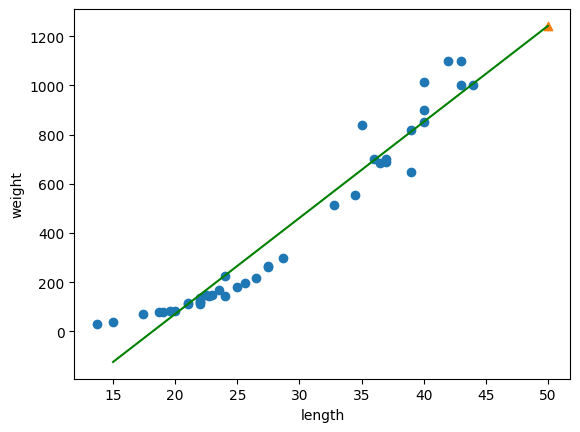

In [12]:
# 시각화
# 훈련 세트
plt.scatter(train_input, train_target)

# 15에서 50까지의 1차 방정식
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_], color='green')

# 50cm 농어
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
# 50cm 농어 예측이 회귀선에 놓여있는 것을 확인
# 성능 확인
# 두 점수에 차이가 좀 나는 것을 확인. 훈련 세트 점수도 낮음 -> 과적합으로 보임
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# **다중회귀**

- y = wx² + wx + c 로 다항식을 표현할 수 있다
- 결국 최적의 곡선을 만드는 w와 c를 찾는 것
- 다중회귀도 선형 회귀 알고리즘을 사용한다. 왜?
  - x²은 다른 변수로 치환하면 선형의 관계로 표현할 수 있기 때문.
  - 관점에 따라 선형 관계가 되기도, 다항 관계가 되기도 한다
<br>
---
<br>

- 그래프 왼쪽 아래는 직선보다는 곡선에 가깝다
- 모델이 예측한 직선에 따르면 농어의 무게가 0g 이하인 것도 있다는 뜻인데 상식적으로 말이 안된다
- 그래서 최적의 직선이 아니라 최적의 곡선으로 찾아보기로 한다

In [15]:
# 2차 방정식을 그리기 위한 데이터 준비
# 길이(x)를 제곱한 항 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [16]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [20]:
# 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 50cm 농어 예측값(무게)
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [21]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


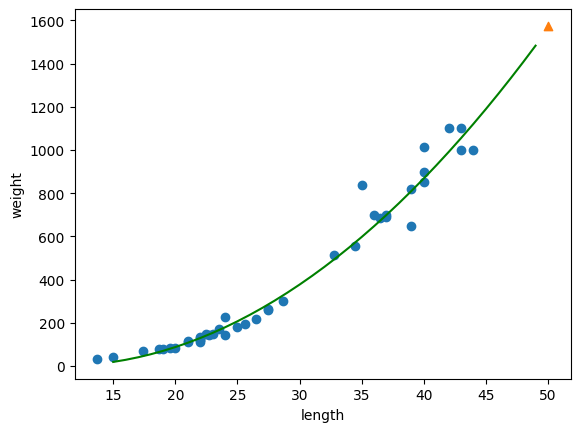

In [27]:
# 필요한 파라미터를 구했으니 시각화 진행

#구간별 직선을 그릴 정수 배열
point = np.arange(15,50)

plt.scatter(train_input, train_target)

#2차 방정식 그래프
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05, color='g')

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
# 훈련 세트와 테스트 세트의 결정 계수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
